In [1]:
import pandas as pd
from prophet import Prophet



In [12]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
# df.head()
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpong4zv23/vj0jhbnd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpong4zv23/_mygc17x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47095', 'data', 'file=/tmp/tmpong4zv23/vj0jhbnd.json', 'init=/tmp/tmpong4zv23/_mygc17x.json', 'output', 'file=/tmp/tmpong4zv23/prophet_modelwjxwow1r/prophet_model-20250707105052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:50:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:50:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


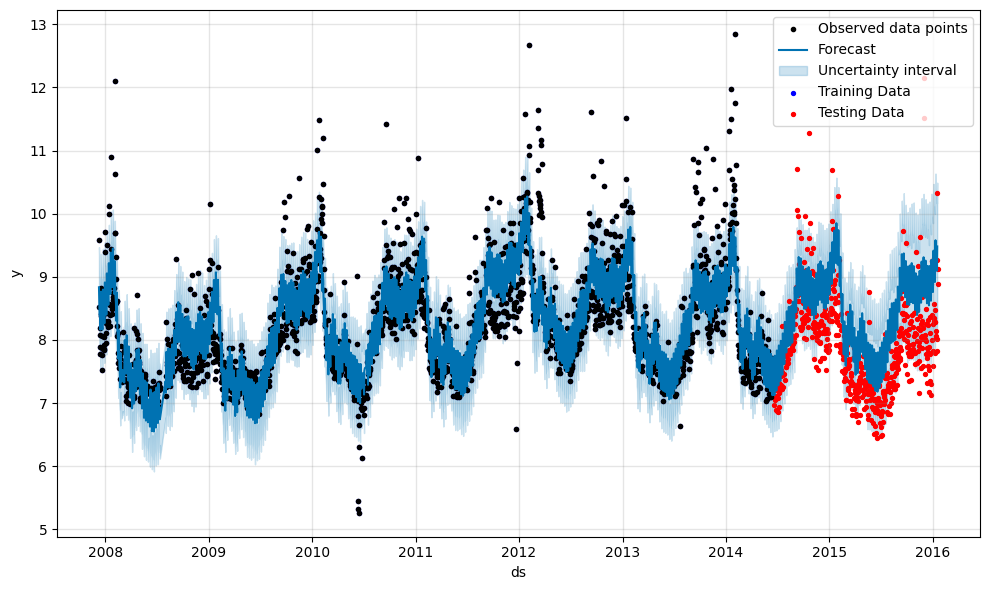

In [21]:
# prompt: split thr model inn 80 20 for training and testing . then terain the model and show on graph both tain and test with deifferent color.

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False) # Time series data, so no shuffle

# Initialize and train the Prophet model
model = Prophet()
model.fit(train_df)

# Make predictions on the test set
future = model.make_future_dataframe(periods=len(test_df))
forecast = model.predict(future)

# Plot the results
fig = model.plot(forecast)

# Plot the training data
ax = fig.gca()
ax.scatter(train_df['ds'], train_df['y'], color='blue', s=8, label='Training Data')

# Plot the testing data
ax.scatter(test_df['ds'], test_df['y'], color='red', s=8, label='Testing Data')

ax.legend()
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpong4zv23/961q_3oz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpong4zv23/o_6oro07.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34015', 'data', 'file=/tmp/tmpong4zv23/961q_3oz.json', 'init=/tmp/tmpong4zv23/o_6oro07.json', 'output', 'file=/tmp/tmpong4zv23/prophet_modelze8z_ee_/prophet_model-20250707105323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:53:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


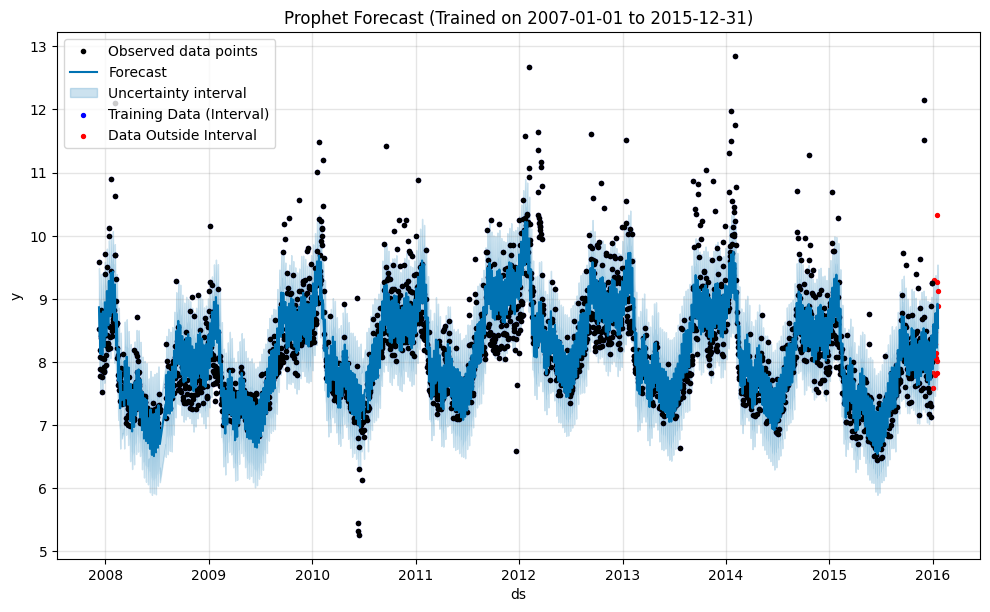

In [23]:
# prompt: for particular time interval we train a model for that data

import pandas as pd
from prophet import Prophet
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

# Convert 'ds' to datetime objects
df['ds'] = pd.to_datetime(df['ds'])

# Define the start and end dates for the training data
start_date = '2007-01-01'  # Replace with your desired start date
end_date = '2015-12-31'    # Replace with your desired end date

# Filter the DataFrame for the specified time interval
train_df_interval = df[(df['ds'] >= start_date) & (df['ds'] <= end_date)].copy()

# The remaining data can be used for testing or ignored depending on the task
test_df_interval = df[~((df['ds'] >= start_date) & (df['ds'] <= end_date))].copy()


# Initialize and train the Prophet model on the specified interval
model_interval = Prophet()
model_interval.fit(train_df_interval)

# Make predictions. Here, we'll make predictions for the entire original time range
# but you could adjust the future dataframe creation to match your prediction needs.
future_interval = model_interval.make_future_dataframe(periods=len(df) - len(train_df_interval))
forecast_interval = model_interval.predict(future_interval)

# Plot the results
fig_interval = model_interval.plot(forecast_interval)

# Plot the training data within the specified interval
ax_interval = fig_interval.gca()
ax_interval.scatter(train_df_interval['ds'], train_df_interval['y'], color='blue', s=8, label='Training Data (Interval)')

# Plot the data outside the interval (if you want to visualize how the model performs)
ax_interval.scatter(test_df_interval['ds'], test_df_interval['y'], color='red', s=8, label='Data Outside Interval')

ax_interval.legend()
plt.title(f'Prophet Forecast (Trained on {start_date} to {end_date})')
plt.show()

In [ ]:
# prompt: for specific time periosd hoe we train the model?

import matplotlib.pyplot as plt
# Define the start and end dates for training
start_date = '2007-12-10'
end_date = '2015-06-15'

# Filter the dataframe for the specific time period
train_df_specific_period = df[(df['ds'] >= start_date) & (df['ds'] <= end_date)].copy()

# Initialize and train the Prophet model with the filtered data
model_specific_period = Prophet()
model_specific_period.fit(train_df_specific_period)

# Make predictions (you'll need to define a future dataframe based on your needs)
# For example, to predict the next year starting from the end of your training period:
future_specific_period = model_specific_period.make_future_dataframe(periods=365)
forecast_specific_period = model_specific_period.predict(future_specific_period)

# Plot the results (optional, but helpful for visualization)
fig_specific_period = model_specific_period.plot(forecast_specific_period)

# Plot the data used for training
ax_specific_period = fig_specific_period.gca()
ax_specific_period.scatter(train_df_specific_period['ds'], train_df_specific_period['y'], color='blue', s=8, label='Training Data (Specific Period)')
ax_specific_period.legend()
plt.show()


In [20]:
# Python
m = Prophet()
m.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpong4zv23/gfhxelfw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpong4zv23/dz2_5n70.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51054', 'data', 'file=/tmp/tmpong4zv23/gfhxelfw.json', 'init=/tmp/tmpong4zv23/dz2_5n70.json', 'output', 'file=/tmp/tmpong4zv23/prophet_modely0uhhjsf/prophet_model-20250707104927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:49:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:49:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()


,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [5]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210097,7.515479,8.921337
3266,2017-01-16,8.535122,7.812968,9.228794
3267,2017-01-17,8.322549,7.612207,9.053937
3268,2017-01-18,8.155179,7.452809,8.858138
3269,2017-01-19,8.167136,7.422829,8.930747


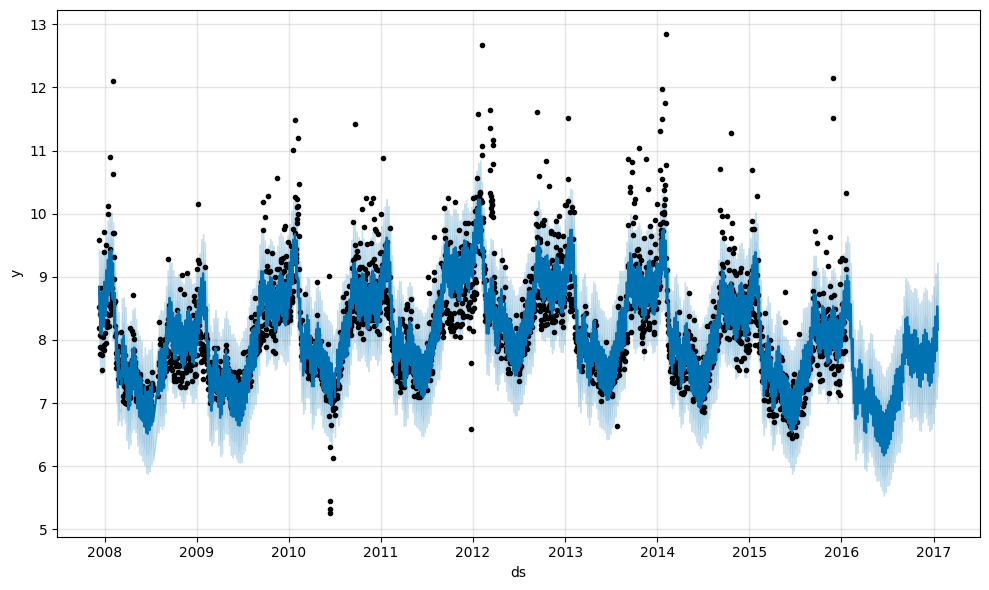

In [6]:
# Python
fig1 = m.plot(forecast)



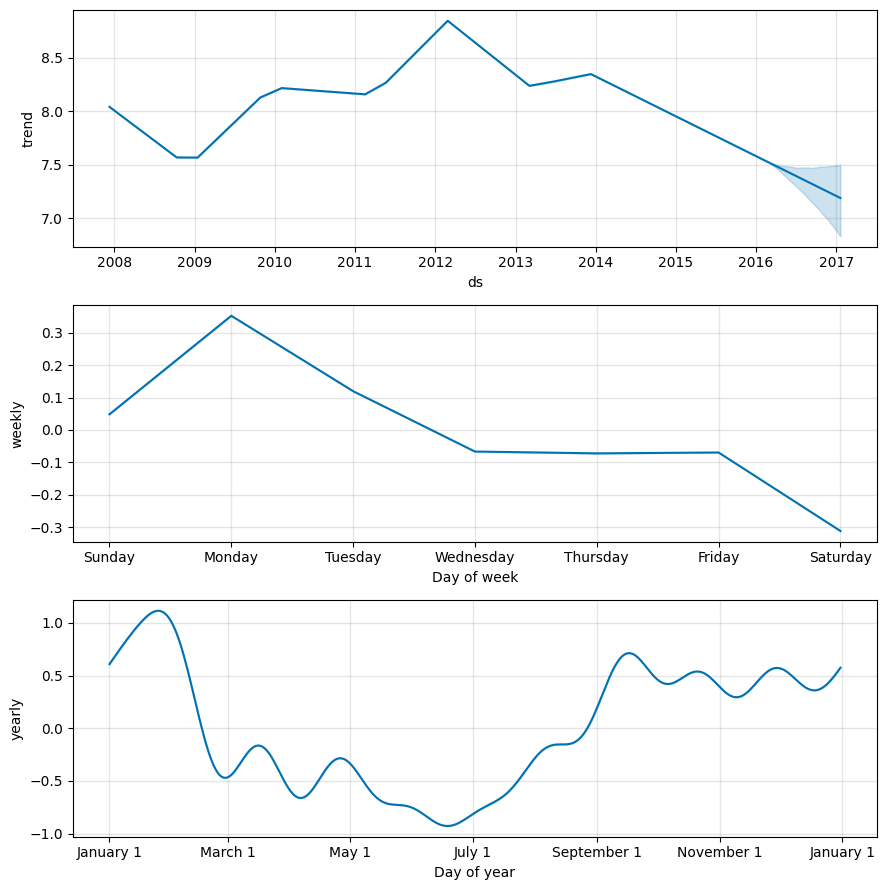

In [7]:
# Python
fig2 = m.plot_components(forecast)



In [8]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


In [9]:
# Python
plot_components_plotly(m, forecast)


/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.

